In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
df=pd.read_csv('Toyoto_Corrola.csv')
df

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86,3,4,5,1025
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86,3,4,5,1015
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86,3,4,5,1015
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86,3,4,5,1015


In [3]:
df.drop('Id',axis=1,inplace=True)
df.drop('Doors',axis=1,inplace=True)
df.drop('Cylinders',axis=1,inplace=True)
df.drop('Gears',axis=1,inplace=True)
df.drop('Weight',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Model      1436 non-null   object
 1   Price      1436 non-null   int64 
 2   Age_08_04  1436 non-null   int64 
 3   KM         1436 non-null   int64 
 4   HP         1436 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 56.2+ KB


In [4]:
df

,Model,Price,Age_08_04,KM,HP
0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90
2,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90
3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90
4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90
...,...,...,...,...,...
1431,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86
1432,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86
1433,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86
1434,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86


In [5]:
df.isna().sum()

Model        0
Price        0
Age_08_04    0
KM           0
HP           0
dtype: int64

In [6]:
df.corr()

,Price,Age_08_04,KM,HP
Price,1.00000,-0.876590,-0.569960,0.314990
Age_08_04,-0.87659,1.000000,0.505672,-0.156622
KM,-0.56996,0.505672,1.000000,-0.333538
HP,0.31499,-0.156622,-0.333538,1.000000


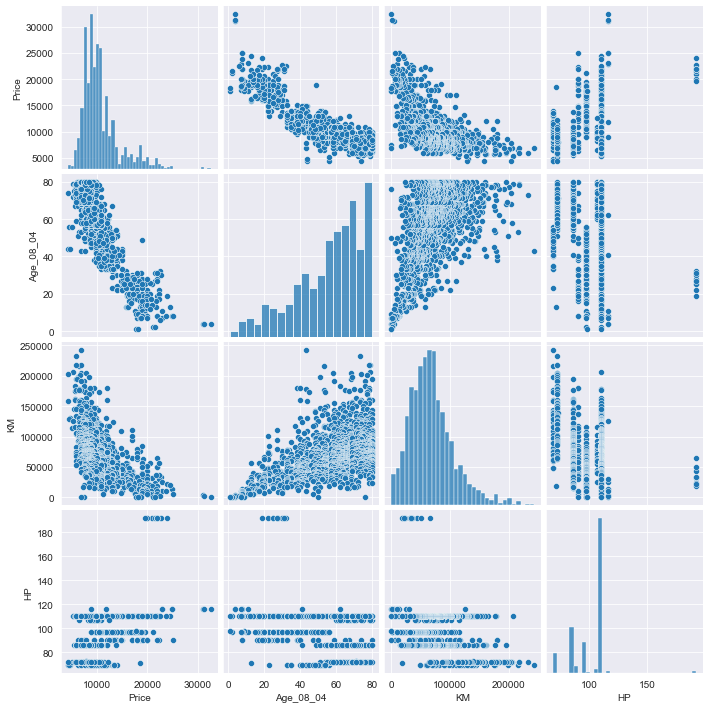

In [7]:
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [8]:
import statsmodels.formula.api as smf
model=smf.ols('Price~+Age_08_04+KM+HP',data=df).fit()

In [9]:
model.params

Intercept    16450.188784
Age_08_04     -154.626264
KM              -0.011462
HP              36.620541
dtype: float64

In [10]:
print(model.tvalues,'\n',model.pvalues)

Intercept    46.771051
Age_08_04   -59.432324
KM           -8.479736
HP           12.388317
dtype: float64 
 Intercept    1.239303e-290
Age_08_04     0.000000e+00
KM            5.539700e-17
HP            1.479626e-33
dtype: float64


In [11]:
(model.rsquared,model.rsquared_adj)

(0.8103061982045447, 0.8099087949884928)

# Simple Regression Model

In [12]:
ml_v=smf.ols('Price~KM',data=df).fit()
print(ml_v.tvalues,ml_v.pvalues)

Intercept    88.510378
KM          -26.267601
dtype: float64 Intercept     0.000000e+00
KM           1.757913e-124
dtype: float64


In [13]:
ml_v=smf.ols('Price~HP',data=df).fit()
print(ml_v.tvalues,ml_v.pvalues)

Intercept     4.803134
HP           12.567862
dtype: float64 Intercept    1.725695e-06
HP           1.926234e-34
dtype: float64


In [14]:
ml_v=smf.ols('Price~Age_08_04',data=df).fit()
print(ml_v.tvalues,ml_v.pvalues)

Intercept    138.907847
Age_08_04    -68.978267
dtype: float64 Intercept    0.0
Age_08_04    0.0
dtype: float64


In [15]:
#ml_v=smf.ols('Price~Model',data=df).fit()
#print(ml_v.tvalues,ml_v.pvalues)

In [16]:
ml_v=smf.ols('Price~HP+KM',data=df).fit()
print(ml_v.tvalues,ml_v.pvalues)

Intercept    17.060866
HP            6.183984
KM          -23.020336
dtype: float64 Intercept     1.468198e-59
HP            8.136379e-10
KM           4.902715e-100
dtype: float64


In [17]:
ml_v=smf.ols('Price~Age_08_04+KM',data=df).fit()
print(ml_v.tvalues,ml_v.pvalues)

Intercept    146.258516
Age_08_04    -56.334219
KM           -12.130199
dtype: float64 Intercept    0.000000e+00
Age_08_04    0.000000e+00
KM           2.636340e-32
dtype: float64


In [18]:
ml_v=smf.ols('Price~Age_08_04+Model',data=df).fit()
print(ml_v.tvalues,ml_v.pvalues)

Intercept                                                                         15.370732
Model[T.TOYOTA Corolla ! 1.6-16v vvt-i sol airco sedan 4/5-Doors]                 -0.534089
Model[T.TOYOTA Corolla 1 6-16v VVT-i Linea Terra Comfort Airco 5drs 4/5-Doors]     0.858340
Model[T.TOYOTA Corolla 1.3 16V 2/3-Doors]                                         -0.488014
Model[T.TOYOTA Corolla 1.3 16V HATCHB 2/3-Doors]                                  -1.435482
                                                                                    ...    
Model[T.ÊTOYOTA Corolla LIFTBACK 1.4 VVT-i LINEA TERRA 4/5-Doors]                  0.211831
Model[T.ÊTOYOTA Corolla LIFTBACK 1.6 Linea terra 4/5-Doors]                       -0.246808
Model[T.ÊTOYOTA Corolla VERSO 2.0 D4D LINEA SOL MPV]                               6.761694
Model[T.ÊTOYOTA Corolla VERSO 2.0 D4D SOL (7) BNS MPV]                            11.703163
Age_08_04                                                                       

## Calculating VIF

In [19]:


rsq_wt = smf.ols('Model~Age_08_04+KM+HP',data=df).fit().rsquared  
vif_wt = 1/(1-rsq_wt) # 564.98

rsq_vol = smf.ols('Age_08_04~Model+KM+HP',data=df).fit().rsquared  
vif_vol = 1/(1-rsq_vol) #  564.84

rsq_sp = smf.ols('KM~Age_08_04+Model+HP',data=df).fit().rsquared  
vif_sp = 1/(1-rsq_sp) #  16.35

rsq_sq = smf.ols('HP~Age_08_04+Model+KM',data=df).fit().rsquared  
vif_sq = 1/(1-rsq_sq) #  16.35

# Storing vif values in a data frame
d1 = {'Variables':['Model','Age_08_04','KM,HP'],'VIF':[vif_wt,vif_vol,vif_sp,vif_sq]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

ValueError: endog has evaluated to an array with multiple columns that has shape (1436, 372). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).

# Residual Analysis

## Test for Normality of Residuals (Q-Q Plot)

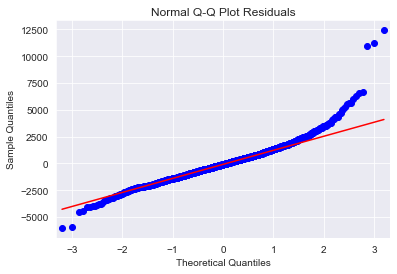

In [20]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q Plot Residuals')
plt.show()

In [21]:
list(np.where(model.resid>2800))

[array([   7,   13,   14,   15,   16,   45,   46,   49,   52,   53,   62,
          66,   68,   72,   74,   76,   89,   91,   92,   95,  109,  110,
         111,  112,  113,  114,  115,  116,  118,  119,  121,  125,  138,
         141,  146,  147,  149,  154,  161,  171,  174,  179,  523,  557,
         696,  913, 1054, 1058, 1059, 1079, 1081, 1082, 1109, 1175, 1182,
        1383, 1402], dtype=int64)]

# Residual Plots for Homoscedasticity

In [22]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

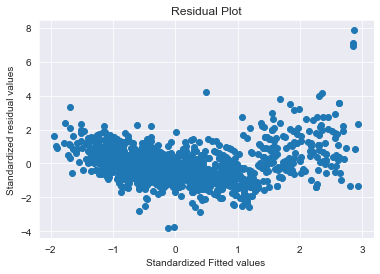

In [23]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual vs Regressors

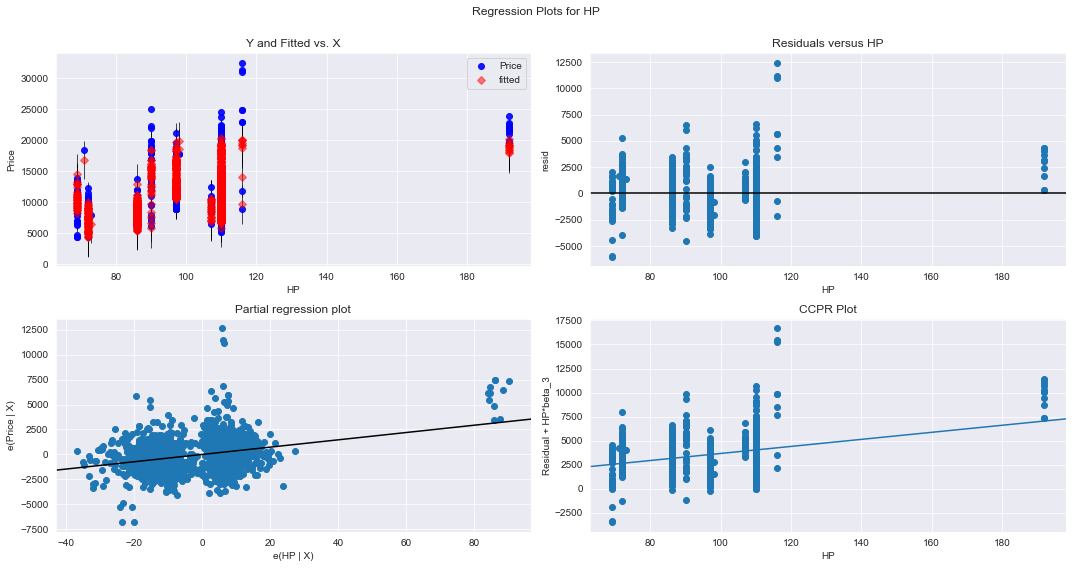

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

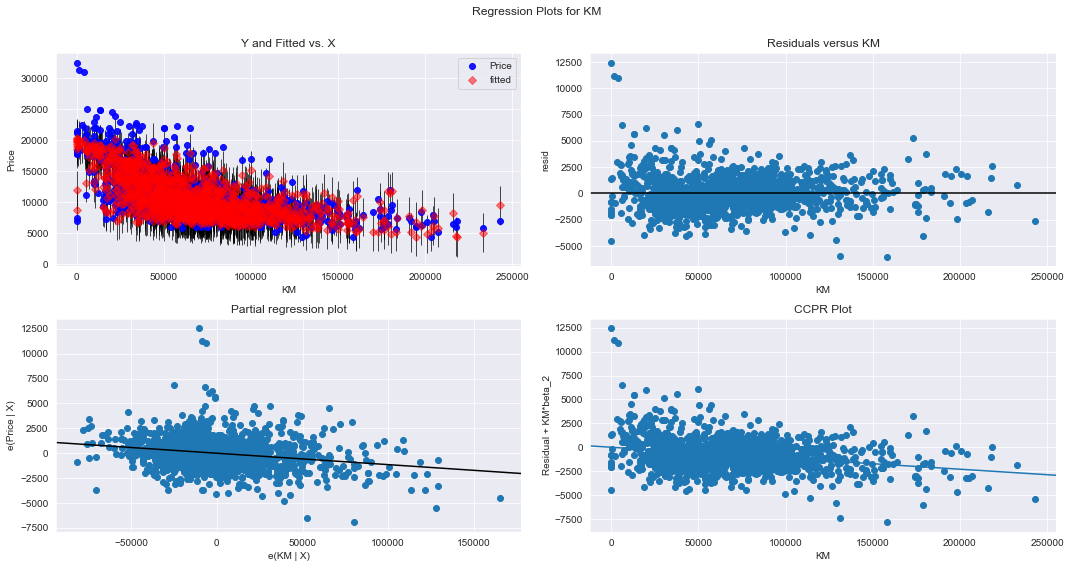

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

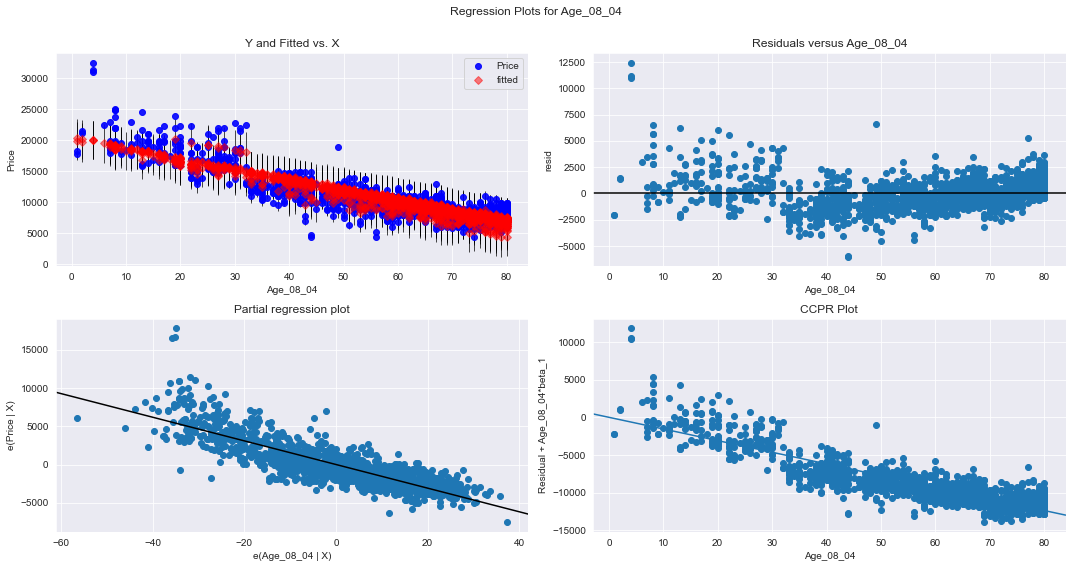

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

# Model Detection Diagnotics

## Detecting Outliers

### Cook's Distance

In [27]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

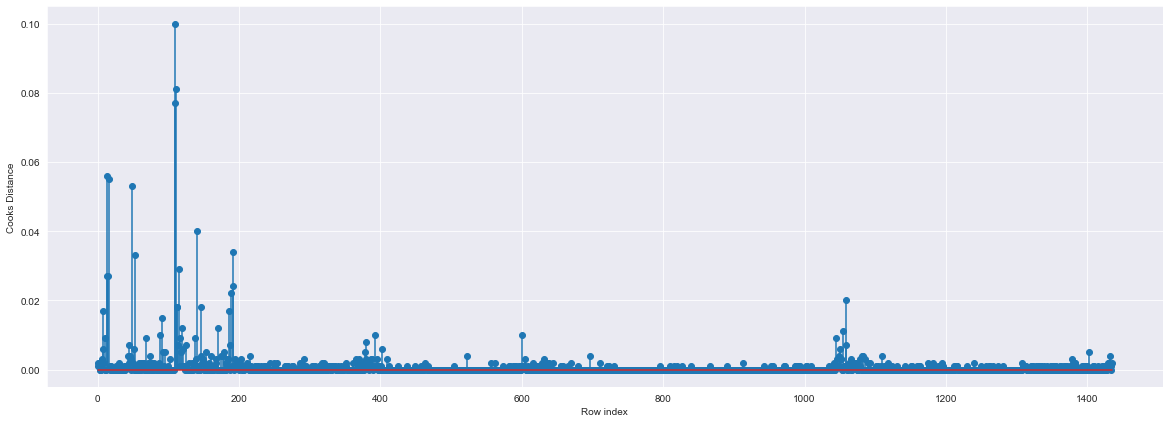

In [28]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

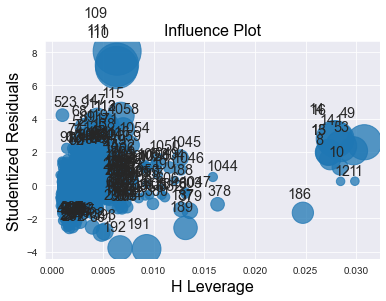

In [29]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [30]:
(np.argmax(c),np.max(c))

(109, 0.10016319600529604)

<AxesSubplot:>

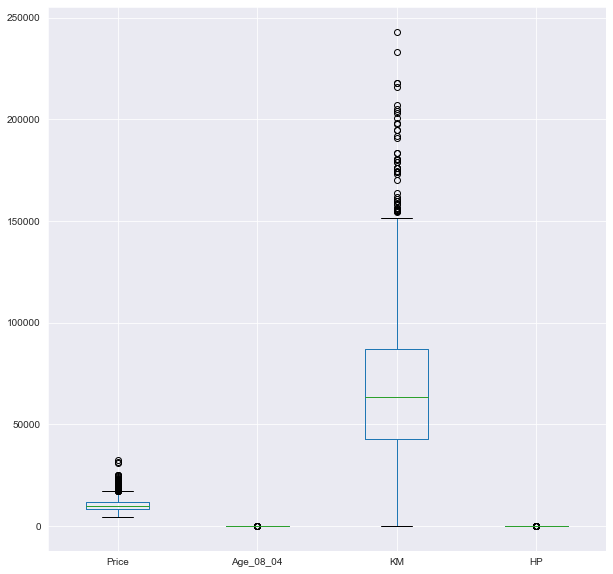

In [31]:
df.boxplot(figsize=('10','10'))

In [32]:
df.KM.mean()

68533.25974930362

In [33]:
df.KM.std()

37506.44887218956

In [34]:
df.Price.mean()

10730.824512534818

In [35]:
df.Price.std()

3626.9645849102394

In [36]:
(np.argmax(c),np.max(c))

(109, 0.10016319600529604)

In [37]:
df[df.index.isin([2])]

,Model,Price,Age_08_04,KM,HP
2,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90


In [38]:
df1=df.drop(df.index[[2]],axis=0).reset_index()

In [39]:
df1.drop(['index'],axis=1)
df1

,index,Model,Price,Age_08_04,KM,HP
0,0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90
1,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90
3,4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,61000,90
...,...,...,...,...,...,...
1430,1431,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86
1431,1432,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86
1432,1433,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86
1433,1434,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86


In [40]:
final_ml_V=smf.ols('Price~Age_08_04+KM+HP',data=df1).fit()

In [41]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8103392790479556, 25216.80547290017)

In [42]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

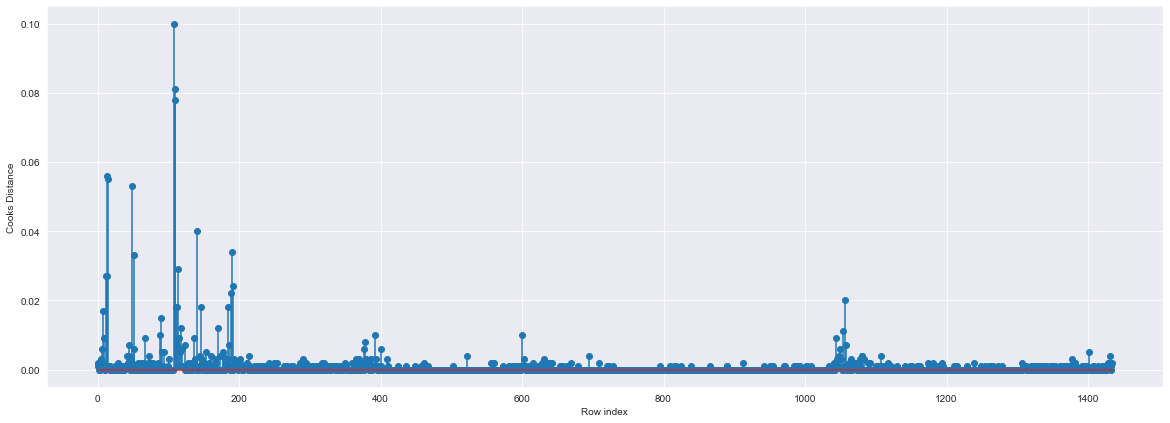

In [43]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [44]:
(np.argmax(c_V),np.max(c_V))

(108, 0.10028486987188616)

In [45]:
df1[df1.index.isin([5])]

,index,Model,Price,Age_08_04,KM,HP
5,6,ÊTOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,16900,27,94612,90


In [46]:
df2=df1.drop(df1.index[[5]],axis=0)
df2

,index,Model,Price,Age_08_04,KM,HP
0,0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90
1,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90
3,4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,61000,90
...,...,...,...,...,...,...
1430,1431,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86
1431,1432,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86
1432,1433,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86
1433,1434,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86


In [47]:
df3=df2.reset_index()

In [48]:
df4=df3.drop(['index'],axis=1)

In [49]:
df4

,level_0,Model,Price,Age_08_04,KM,HP
0,0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90
1,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90
2,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90
3,3,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90
4,4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,61000,90
...,...,...,...,...,...,...
1429,1430,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86
1430,1431,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86
1431,1432,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86
1432,1433,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86


In [50]:
final_ml_V=smf.ols('Price~Age_08_04+KM+HP',data=df4).fit()

In [51]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8102648258632443, 25197.90107938778)

In [52]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

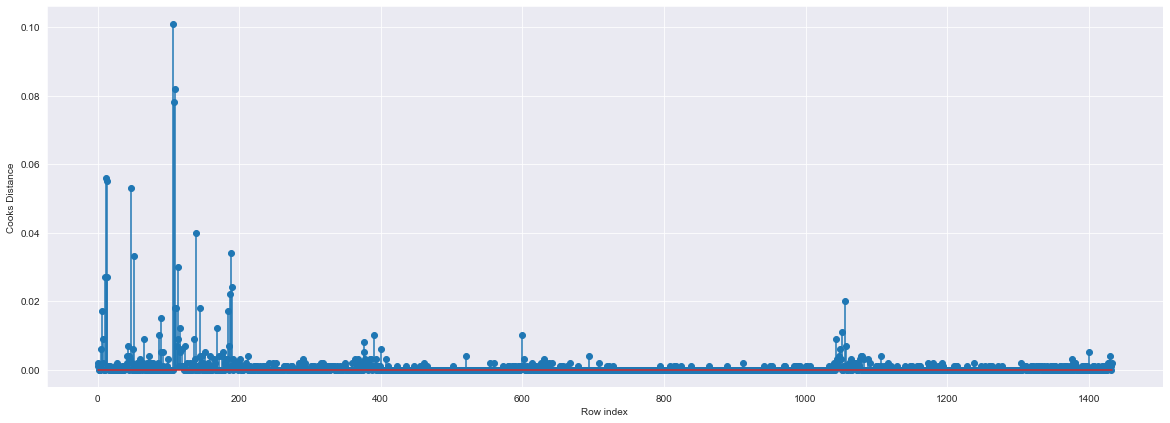

In [53]:
 fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(df4)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [54]:
(np.argmax(c_V),np.max(c_V))

(107, 0.10063988497884355)

In [55]:
df5=df4.drop(df1.index[[63]],axis=0)
df5 

,level_0,Model,Price,Age_08_04,KM,HP
0,0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90
1,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90
2,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90
3,3,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90
4,4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,61000,90
...,...,...,...,...,...,...
1429,1430,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86
1430,1431,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86
1431,1432,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86
1432,1433,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86


In [56]:
df6=df5.reset_index()

In [57]:
df7=df6.drop(['index'],axis=1)

In [58]:
df7

,level_0,Model,Price,Age_08_04,KM,HP
0,0,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90
1,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90
2,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90
3,3,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90
4,4,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,61000,90
...,...,...,...,...,...,...
1428,1430,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,20544,86
1429,1431,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,19000,86
1430,1432,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,17016,86
1431,1433,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,16916,86


In [63]:
final_ml_V=smf.ols('Price~+Age_08_04+KM+HP',data=df7).fit()

In [64]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8099128164627517, 25181.035704804104)

# Predicting New Value

In [65]:
new_data=pd.DataFrame({"Age_08_04":23,"KM":46986,"HP":90},index=[1])

In [66]:
final_ml_V.predict(new_data)

1    15646.3916
dtype: float64

In [68]:
final_ml_V.predict(df.iloc[0:5,])

0    15646.391600
1    15346.750543
2    15552.844939
3    15171.321508
4    14663.196432
dtype: float64

In [70]:
pred_y = final_ml_V.predict(df)

In [72]:
pred_y

0       15646.391600
1       15346.750543
2       15552.844939
3       15171.321508
4       14663.196432
            ...     
1431     8700.457166
1432     8254.922808
1433     8432.284907
1434     8587.893557
1435     8734.639510
Length: 1436, dtype: float64